<a href="https://colab.research.google.com/github/lakus1251/Machine-learning/blob/main/%D0%9C%D0%B0%D1%87%D0%B5%D0%B1%D1%80%D0%BE%D0%B4%D0%B0_%D0%9B%D0%912.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Зчитуємо датасет з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]

df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [44]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [45]:
#Поточні назви стовпців
current_columns =[
    ([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )
]

#Зручні назви стовпців
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]

#Перетворення MultiIndex на однорівневий індекс з новими назвами
df.columns = new_columns

#Відобразимо перші кілька рядків
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [46]:
# Виберемо необхідні стовпці та надамо їм нові назви
selected_columns = {
    'IMF_Forecast' :'MVF_2024',
    'WorldBank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]
#Перейменуймо стовпці
df=df1.rename(columns=selected_columns)

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [47]:
# 3. Визначити розмір датасета
print(gdp_df.shape)

(210, 7)


In [56]:
#Перевірка наявності відсутніх значень у кожному стовпці
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [58]:
# 6. Визначити тип даних
print("\nТип даних кожного стовпця\n",df.dtypes)


Тип даних кожного стовпця
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [61]:
# 7. Заміна значень "—" на NaN і перевірка на пропущені значення
df.replace("—", float('nan'), inplace=True)
#Переведемо стовпці у тип float
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'],errors = 'coerce')
df['WorldBank_2023'] =pd.to_numeric(df['WorldBank_2023'],errors = 'coerce')
df['OON_2022'] =pd.to_numeric(df['OON_2022'],errors = 'coerce')

#Виведемо типи даних після конвертації
print("\nТип даних після конвертації\n",df.dtypes)

df.head(10)


Тип даних після конвертації
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [62]:
# 8. Замінити пропущені значення на середнє
gdp_df.fillna(gdp_df.mean(numeric_only=True), inplace=True)
print(gdp_df.isnull().sum())  # Ще раз перевірка на пропущені значення

Country/Territory   Country/Territory     0
IMF[1][13]          Forecast             15
                    Year                 15
World Bank[14]      Estimate              8
                    Year                  8
United Nations[15]  Estimate              1
                    Year                  1
dtype: int64


In [68]:
# 9. Перевірка наявності дублікатів і видалення при наявності
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())  # Перевірка, що дублікатів немає

0


In [67]:
# 10. Вивести описову статистику датасету
df.describe()


,MVF_2024,WorldBank_2023,OON_2022
count,1.950000e+02,2.020000e+02,2.090000e+02
mean,1.123228e+06,1.037206e+06,9.612699e+05
std,8.200460e+06,7.751885e+06,7.293077e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.327600e+04,9.284000e+03,8.772000e+03
50%,4.679000e+04,3.757300e+04,3.171700e+04
75%,2.978445e+05,2.594322e+05,2.371010e+05
max,1.095292e+08,1.054355e+08,1.008348e+08


In [70]:
df.columns

Index(['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'], dtype='object')

In [71]:
# 11. Визначення відхилення між показниками MVF_2024 та WorldBank_2023
df['Deviation_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']
print(df[['Country', 'Deviation_MVF_WB']].sort_values(by='Deviation_MVF_WB', ascending=False).head())

          Country  Deviation_MVF_WB
0           World         4093676.0
1   United States         1420148.0
2           China          737851.0
5           India          387092.0
12         Mexico          228138.0


In [73]:
# 12. Обчислення кореляції між показниками
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation_matrix)

                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999987  0.999902
WorldBank_2023  0.999987        1.000000  0.999932
OON_2022        0.999902        0.999932  1.000000


In [74]:
# 13. Обчислення середнього значення для кожного стовпця
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print(mean_values)

MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64


In [76]:
# 14. Обчислення стандартного відхилення показників для кожної країни
df['Std_Dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
print(df[['Country', 'Std_Dev']].sort_values(by='Std_Dev', ascending=False).head())


          Country       Std_Dev
0           World  4.349674e+06
1   United States  1.519553e+06
2           China  3.866667e+05
12         Mexico  2.782759e+05
3         Germany  2.665736e+05


In [77]:
# 15. Визначення країни з найвищим та найнижчим показниками
highest_gdp = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']].max()
lowest_gdp = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']].min()
print("Highest GDP:", highest_gdp)
print("Lowest GDP:", lowest_gdp)

Highest GDP: Country              Zimbabwe
MVF_2024          109529216.0
WorldBank_2023    105435540.0
OON_2022          100834796.0
dtype: object
Lowest GDP: Country           Afghanistan
MVF_2024                 66.0
WorldBank_2023           62.0
OON_2022                 59.0
dtype: object


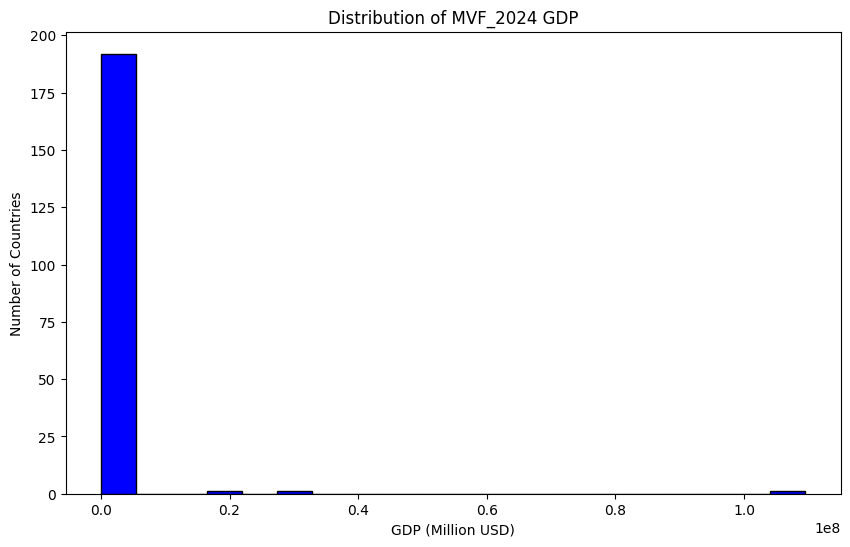

In [79]:
# 16. Побудова гістограми для розподілу показників MVF_2024
plt.figure(figsize=(10,6))
plt.hist(df['MVF_2024'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Distribution of MVF_2024 GDP')
plt.xlabel('GDP (Million USD)')
plt.ylabel('Number of Countries')
plt.show()

In [80]:
# 17. Розрахунок частки кожної країни в загальному значенні для кожного року
total_gdp = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].sum()
df['Share_MVF_2024'] = df['MVF_2024'] / total_gdp['MVF_2024']
df['Share_WB_2023'] = df['WorldBank_2023'] / total_gdp['WorldBank_2023']
df['Share_OON_2022'] = df['OON_2022'] / total_gdp['OON_2022']
print(df[['Country', 'Share_MVF_2024', 'Share_WB_2023', 'Share_OON_2022']].head())


         Country  Share_MVF_2024  Share_WB_2023  Share_OON_2022
0          World        0.500066       0.503235        0.501902
1  United States        0.131403       0.130591        0.128140
2          China        0.084613       0.084933        0.089411
3        Germany        0.020961       0.021268        0.020293
4          Japan        0.018767       0.020108        0.021066


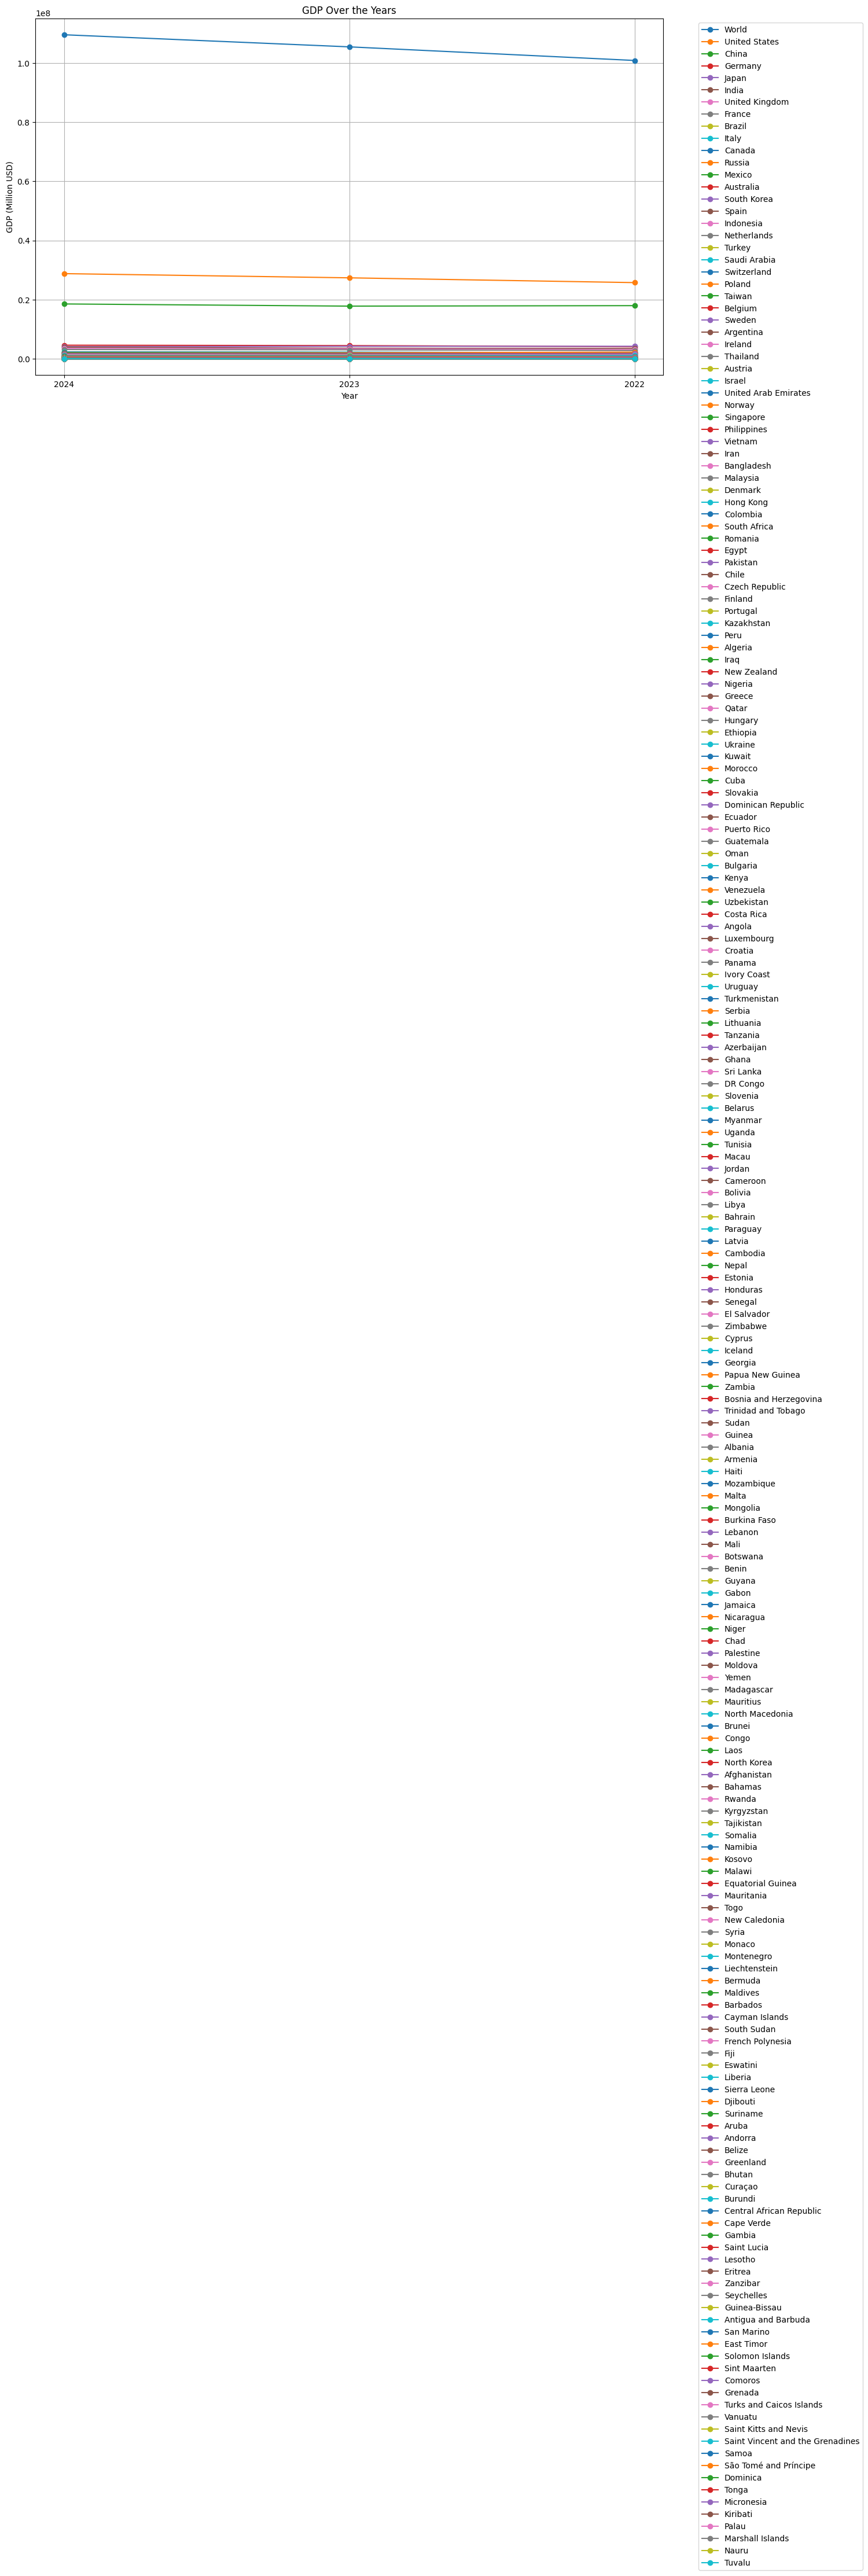

In [81]:
# 18. Візуалізація змін в показниках для кожної країни на графіку
plt.figure(figsize=(14,8))
for index, row in df.iterrows():
    plt.plot(['2024', '2023', '2022'], [row['MVF_2024'], row['WorldBank_2023'], row['OON_2022']], marker='o', label=row['Country'])
plt.title('GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Million USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()